In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from colorama import Fore, Back, Style
import numpy as np

In [3]:
dicom_data = pd.read_csv('archive/csv/dicom_info.csv')
metadata = pd.read_csv('archive/csv/meta.csv')
df_mass_train = pd.read_csv('archive/csv/mass_case_description_train_set.csv')
df_mass_test = pd.read_csv('archive/csv/mass_case_description_test_set.csv')
df_mass_train

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [4]:
image_dir = 'archive/jpeg'

In [22]:
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images']
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images']
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images']

In [6]:
for info in zip(cropped_images.iloc[0].index, cropped_images.iloc[0]):
    print(f'{Fore.GREEN}{info[0]}{Style.RESET_ALL}:',info[1])

file_path: CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.dcm
image_path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
AccessionNumber: nan
BitsAllocated: 16
BitsStored: 16
BodyPartExamined: BREAST
Columns: 351
ContentDate: 20160426
ContentTime: 131732.685
ConversionType: WSD
HighBit: 15
InstanceNumber: 1
LargestImagePixelValue: 65535
Laterality: R
Modality: MG
PatientBirthDate: nan
PatientID: Mass-Training_P_01265_RIGHT_MLO_1
PatientName: Mass-Training_P_01265_RIGHT_MLO_1
PatientOrientation: MLO
PatientSex: nan
PhotometricInterpretation: MONOCHROME2
PixelRepresentation: 0
ReferringPhysicianName: nan
Rows: 289
SOPClassUID: 1.2.840.10008.5.1.4.1.1.7
SOPInstanceUID: 1.3.6.1.4.1.9590.100.1.2.426380754911844882201419900442081103076
SamplesPerPixel: 1
SecondaryCaptureDeviceManufacturer: MathWorks
SecondaryCaptureDeviceManufacturerModelName: MATLAB
SeriesDescription: cropped images
SeriesInstanceUID: 1.3.6.1

In [23]:
mass_cropped_train = cropped_images[cropped_images.PatientID.isin(df_mass_train['cropped image file path'].apply(lambda x: x.split('/')[0]))]
mass_cropped_test = cropped_images[cropped_images.PatientID.isin(df_mass_test['cropped image file path'].apply(lambda x: x.split('/')[0]))]
mass_ROI_train = ROI_mask_images[ROI_mask_images.PatientID.isin(df_mass_train['ROI mask file path'].apply(lambda x: x.split('/')[0]))]
mass_ROI_test = ROI_mask_images[ROI_mask_images.PatientID.isin(df_mass_test['ROI mask file path'].apply(lambda x: x.split('/')[0]))]
mass_full_train = full_mammogram_images[full_mammogram_images.PatientID.isin(df_mass_train['image file path'].apply(lambda x: x.split('/')[0]))]
mass_full_test = full_mammogram_images[full_mammogram_images.PatientID.isin(df_mass_test['image file path'].apply(lambda x: x.split('/')[0]))]
print(f"shape of mass_cropped_training: {mass_cropped_train.shape}")
print(f"shape of mass_cropped_test: {mass_cropped_test.shape}")
print(f"shape of mass_ROI_training: {mass_ROI_train.shape}")
print(f"shape of mass_ROI_test: {mass_ROI_test.shape}")
print(f"shape of mass_full_train: {mass_full_train.shape}")
print(f"shape of mass_full_test: {mass_full_test.shape}")

shape of mass_cropped_training: (1318, 38)
shape of mass_cropped_test: (378, 38)
shape of mass_ROI_training: (1318, 38)
shape of mass_ROI_test: (378, 38)
shape of mass_full_train: (1231, 38)
shape of mass_full_test: (361, 38)


In [25]:
for info in zip(mass_ROI_train.iloc[0].index, mass_ROI_train.iloc[8]):
    print(f'{Fore.GREEN}{info[0]}{Style.RESET_ALL}:',info[1])

file_path: CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.209605321012748626627455520162879888688/2-263.dcm
image_path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.209605321012748626627455520162879888688/2-263.jpg
AccessionNumber: nan
BitsAllocated: 8
BitsStored: 8
BodyPartExamined: BREAST
Columns: 3886
ContentDate: 20160426
ContentTime: 103846.138
ConversionType: WSD
HighBit: 7
InstanceNumber: 1
LargestImagePixelValue: 255
Laterality: L
Modality: MG
PatientBirthDate: nan
PatientID: Mass-Training_P_00076_LEFT_MLO_1
PatientName: Mass-Training_P_00076_LEFT_MLO_1
PatientOrientation: MLO
PatientSex: nan
PhotometricInterpretation: MONOCHROME2
PixelRepresentation: 0
ReferringPhysicianName: nan
Rows: 6271
SOPClassUID: 1.2.840.10008.5.1.4.1.1.7
SOPInstanceUID: 1.3.6.1.4.1.9590.100.1.2.297642943211394359241121340283685710352
SamplesPerPixel: 1
SecondaryCaptureDeviceManufacturer: MathWorks
SecondaryCaptureDeviceManufacturerModelName: MATLAB
SeriesDescription: ROI mask images
SeriesInstanceUID: 1.3.6.1.4.1

In [9]:
cropped_train_images_path = mass_cropped_train.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_test_images_path = mass_cropped_test.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_train_images_path = mass_ROI_train.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_test_images_path = mass_ROI_test.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_training_images_path = mass_full_train.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_test_images_path = mass_full_test.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))

In [24]:
#resize every image to same dimensions
def resize_image(path):
    for i in range(len(path)):
        img = cv.imread(path.values[i], cv.IMREAD_GRAYSCALE)
        if (type(img) == type(None)):
            pass
        else:
            img = cv.resize(img, (256, 256), interpolation=cv.INTER_AREA)
            cv.imwrite(path.values[i], img)
resize_image(ROI_test_images_path)
resize_image(ROI_train_images_path)
resize_image(cropped_test_images_path)
resize_image(cropped_train_images_path)

archive/jpeg/1.3.6.1.4.1.9590.100.1.2.271196701611666628735372012851189292665/2-180.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.298395396913193633428106412961761545595/2-122.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.310354580112648215506863264034185988534/2-184.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.306532397312231245707190473473419369804/2-177.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.282977447212059741734758964482951094442/2-015.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.271766004813533818834432213950296794827/2-038.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.293186695712418317826410436081321367919/2-212.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.298648398112853530923210871563609947010/2-196.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.288750095111620690127940276520877836108/2-209.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.323291677311591228208438770392577269840/2-252.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.305608761311452355602792766720481770937/2-137.jpg
archive/jpeg/1.3.6.1.4.1.9590.10

[ WARN:0@37613.411] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.310354580112648215506863264034185988534/2-184.jpg'): can't open/read file: check file path/integrity
[ WARN:0@37613.496] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.313505299312573284435154387532392130079/2-238.jpg'): can't open/read file: check file path/integrity
[ WARN:0@37613.505] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.312109483013126559515254204702956315159/2-186.jpg'): can't open/read file: check file path/integrity


archive/jpeg/1.3.6.1.4.1.9590.100.1.2.305394303611452161700668770890569784420/2-208.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.32422377312658223238640623520777538644/2-296.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.330163983812746852405062655053253634134/2-106.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.325269065813060982105594538431355675682/2-205.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.257877384211555448010431660912151834962/2-189.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.275099505413660906340937714374028999095/2-113.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.322635074812434597915459176203713798271/2-216.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.269216781211345586324401903492824936568/2-178.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.277521333612539669533671144223025553484/2-124.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.25068466813068804538179331880251594913/2-089.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.250048723412722873040250881911272043627/1-136.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.

[ WARN:0@37618.368] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.316298261312019251424151835271692075228/2-241.jpg'): can't open/read file: check file path/integrity


archive/jpeg/1.3.6.1.4.1.9590.100.1.2.26248858112631842442452410163585734010/2-006.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.309137596311103924008154031644268606037/2-079.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.328461764911878115334285413513283421596/2-099.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.252286136612361960901008170522983094347/2-155.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.299479312912648479419761596652152845359/2-203.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.286898270210290389222743340814072130884/2-240.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.269247772812800655432369470871957942059/2-188.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.276507869711889466025221201043664468321/2-105.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.304047329610483978323624639211723767286/2-135.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.277037318712362225437760014681267210229/2-193.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.26276768511884824313713790820473045352/2-170.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.

[ WARN:0@37633.307] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.314897276811732626217434331163305836897/1-000.jpg'): can't open/read file: check file path/integrity


archive/jpeg/1.3.6.1.4.1.9590.100.1.2.324309622011475628318154737932701357211/1-159.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.266072811911023523927841675793019037832/1-141.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.320866693113864447514884110163742534443/1-125.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.271414424911670964506067728680989711189/1-226.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.320693689810782044906578213673576310905/2-151.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.310417008311970894938815230770265106023/1-271.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.265708461310696308514982120193169816782/2-175.jpg


[ WARN:0@37633.916] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.310417008311970894938815230770265106023/1-271.jpg'): can't open/read file: check file path/integrity


archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29318932712695951431444118093650037083/2-032.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.309008803712151034042556394480768984762/1-038.jpg


[ WARN:0@37634.129] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29318932712695951431444118093650037083/2-032.jpg'): can't open/read file: check file path/integrity


archive/jpeg/1.3.6.1.4.1.9590.100.1.2.273583962611358776237919717661223592624/1-014.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.315125145610617342117509244450818889685/1-203.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.26316563411345028623201688773824119915/1-263.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.244149282511184643506445666910676855808/1-173.jpg


[ WARN:0@37635.087] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.315125145610617342117509244450818889685/1-203.jpg'): can't open/read file: check file path/integrity


archive/jpeg/1.3.6.1.4.1.9590.100.1.2.301805576312136110926505701523451263527/2-000.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.248115994912525429104448387842986945186/1-245.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.331295433311276525933663133590565317152/2-047.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.284195333512847807316022877833484395283/1-144.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.312484986211624832205000935803744799999/2-114.jpg


[ WARN:0@37636.361] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.312484986211624832205000935803744799999/2-114.jpg'): can't open/read file: check file path/integrity


archive/jpeg/1.3.6.1.4.1.9590.100.1.2.288153362111736388134863963471171051300/1-071.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.308540817510816144939801819142526237116/2-005.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.311132814312615054403783067432154879476/2-208.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.254830555613359911614823837744282171458/1-192.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.259172840011201321837687875911695260516/1-295.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.261563112911930807513350544711445999750/1-291.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.315911877812396757514805955883366749551/2-130.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.277277002311039381819362164753220552653/2-267.jpg


[ WARN:0@37639.827] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.315911877812396757514805955883366749551/2-130.jpg'): can't open/read file: check file path/integrity


archive/jpeg/1.3.6.1.4.1.9590.100.1.2.256092653510382439619272441782239245199/2-156.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.328562269210429133327752295793440681562/2-246.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.325966417613742936321163555014008553282/1-137.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.311313415912769148235686849460609112304/1-038.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.288520517011500966318936802952535540775/2-166.jpg


[ WARN:0@37642.522] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.311313415912769148235686849460609112304/1-038.jpg'): can't open/read file: check file path/integrity


archive/jpeg/1.3.6.1.4.1.9590.100.1.2.249138173712971928019444463954261443110/2-222.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.249740277412732082312158987552266485829/2-111.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.299077753913268345218978871282155483744/1-014.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.251098045911979762921708304802076525274/2-084.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.25988000011202301713010123643019546014/2-260.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.270934426611366883900499270491308786787/2-067.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.2800998311573902408253367262894163632/2-298.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.245463468211253768232136260361401907412/1-011.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.296004277912329464712408641582909806637/2-002.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.248738930412691761604421157150827036779/2-148.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.306743297211401286605374765211567197835/1-044.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1

[ WARN:0@37646.714] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.31146332311125185128443680224251602022/1-279.jpg'): can't open/read file: check file path/integrity


archive/jpeg/1.3.6.1.4.1.9590.100.1.2.256308543811354132713957131523353780136/2-197.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.279051539510100096011922323483550767594/2-241.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.250336634911097557638443680202588416494/1-131.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.282766086310914906538734939042147504338/1-060.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.299330577311564728312896329492349721608/1-126.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.312092844012721105907883703442647490264/1-253.jpg


[ WARN:0@37648.541] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('archive/jpeg/1.3.6.1.4.1.9590.100.1.2.312092844012721105907883703442647490264/1-253.jpg'): can't open/read file: check file path/integrity


archive/jpeg/1.3.6.1.4.1.9590.100.1.2.273308505711862061609951098003786442595/1-108.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.309015187311024462635921081873116029283/1-038.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.275037517911912339613409133263529323008/1-124.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.302402964810009466316029984231724658295/1-000.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.293907257910665713422293198341351848937/2-189.jpg


In [ ]:
img_ROI = cv.imread(ROI_train_images_path.values[0], cv.IMREAD_GRAYSCALE)
img_Cropped = cv.imread(cropped_train_images_path.values[0], cv.IMREAD_GRAYSCALE)
img_Full = cv.imread(full_training_images_path.values[0], cv.IMREAD_GRAYSCALE)
def show_images(img1, img2, img3):
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    ax[2].imshow(img3)
    plt.show()
show_images(img_Full, img_Cropped, img_ROI)
img_Cropped.shape

In [159]:

mass_cropped_train[mass_cropped_train.PatientID == 'Mass-Training_P_01039_RIGHT_MLO_6']

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
10126,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.27222...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.272221...,NaN,16,16,BREAST,445,20160426,124730.059,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.272221283212513893305...,1,53843,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.209141083313118462221...,214919.0


In [156]:
#concatenate all roi images into one image, delete rest of roi images and duplicated cropped images for train
for i in range(2, 10):
    sub_df = mass_ROI_train[mass_ROI_train['PatientID'].apply(lambda x: x.endswith(str(i)))]
    for _,row in sub_df.iterrows():
        #path to image we want to concatenate with _1
        row_img_path = row['image_path'].replace('CBIS-DDSM/jpeg', image_dir)
        img1 = cv.imread(row_img_path, cv.IMREAD_GRAYSCALE)
        #patient_id we want to delete later
        patient_id = row['PatientID']
        #patient id of top image
        patient_id_top =  row['PatientID'][0:-2] + '_1'
        img_path_2 = mass_ROI_train[mass_ROI_train['PatientID'].apply(lambda x : x == patient_id_top)].image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
        if len(img_path_2.values) == 0:
            if i == 2: 
                continue
            else:
                patient_id_top =  row['PatientID'][0:-2] + '_2'
                img_path_2 = mass_ROI_train[mass_ROI_train['PatientID'].apply(lambda x : x == patient_id_top)].image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
        img_path_2 = img_path_2.values[0]
        img2 = cv.imread(img_path_2, cv.IMREAD_GRAYSCALE)
        img3 = np.add(img1, img2)
        cv.imwrite(img_path_2, img3)
        mass_ROI_train = mass_ROI_train[mass_ROI_train.PatientID != row['PatientID']]
        mass_cropped_train = mass_cropped_train[mass_cropped_train.PatientID != row['PatientID']]

archive/jpeg/1.3.6.1.4.1.9590.100.1.2.330425343711963672532153494371613409467/2-202.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.109903439411410088111451455240257303269/2-135.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.255470422012641957411262465611415885514/1-076.jpg
No image found for patient Mass-Training_P_00495_RIGHT_MLO_1
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.50930977711228568838275834072066028632/2-146.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.78953662012289228020056948630934822284/2-237.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.36424169110661276032958565582898180862/1-131.jpg
No image found for patient Mass-Training_P_00678_LEFT_CC_1
No image found for patient Mass-Training_P_00431_RIGHT_MLO_1
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.39007778811772901412078260684105777924/1-004.jpg
No image found for patient Mass-Training_P_00958_LEFT_MLO_1
No image found for patient Mass-Training_P_00958_LEFT_CC_1
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.350015940713938391929928687542445659758/1-182.jpg


In [ ]:
#concatenate all roi images into one image, delete rest of roi images and duplicated cropped images for test
for i in range(2, 10):
    sub_df = mass_ROI_test[mass_ROI_test['PatientID'].apply(lambda x: x.endswith(str(i)))]
    for _,row in sub_df.iterrows():
        #path to image we want to concatenate with _1
        row_img_path = row['image_path'].replace('CBIS-DDSM/jpeg', image_dir)
        img1 = cv.imread(row_img_path, cv.IMREAD_GRAYSCALE)
        #patient_id we want to delete later
        patient_id = row['PatientID']
        #patient id of top image
        patient_id_top =  row['PatientID'][0:-2] + '_1'
        img_path_2 = mass_ROI_test[mass_ROI_test['PatientID'].apply(lambda x : x == patient_id_top)].image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
        if len(img_path_2.values) == 0:
            if i == 2: 
                continue
            else:
                patient_id_top =  row['PatientID'][0:-2] + '_2'
                img_path_2 = mass_ROI_test[mass_ROI_test['PatientID'].apply(lambda x : x == patient_id_top)].image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
        img_path_2 = img_path_2.values[0]
        img2 = cv.imread(img_path_2, cv.IMREAD_GRAYSCALE)
        img3 = np.add(img1, img2)
        cv.imwrite(img_path_2, img3)
        mass_ROI_test = mass_ROI_test[mass_ROI_test.PatientID != row['PatientID']]
        mass_cropped_test = mass_cropped_test[mass_cropped_test.PatientID != row['PatientID']]

In [ ]:
cropped_train_images_path = mass_cropped_train.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_test_images_path = mass_cropped_test.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_train_images_path = mass_ROI_train.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_test_images_path = mass_ROI_test.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_training_images_path = mass_full_train.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_test_images_path = mass_full_test.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))

(256, 256)


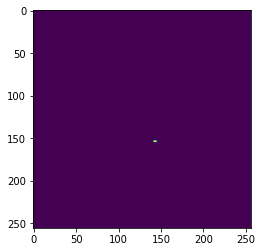

In [21]:
img_path ='archive/jpeg/1.3.6.1.4.1.9590.100.1.2.1050732812368960921696754300312512383/2-259.jpg'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
img = cv.resize(img, (256, 256), interpolation=cv.INTER_AREA)
print(img.shape)
plt.imshow(img)
plt.show()

(89, 105)


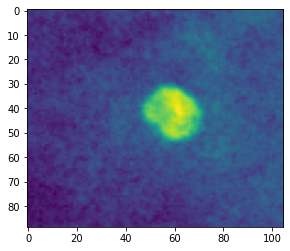

In [17]:

img_path ='archive/jpeg/1.3.6.1.4.1.9590.100.1.2.1050732812368960921696754300312512383/1-281.jpg'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img)
plt.show()